In [1]:
import numpy as np
import cuml
import matplotlib.pyplot as plt
from cuml.common.device_selection import using_device_type


In [2]:
# Load the npz file
loaded_data = np.load('features/max_bias_model_outputs_and_labels.npz')

# Extract outputs (features) and labels
outputs_array = loaded_data['outputs']
labels_array = loaded_data['labels']

# Perform t-SNE using cuML
with using_device_type('gpu'):
    tsne_cuml = cuml.TSNE(n_components=2, perplexity=30, learning_rate=200, verbose=6, random_state=42)
    embeddings = tsne_cuml.fit_transform(outputs_array)


/home/g6/anaconda3/envs/rapids-23.08/lib/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)


[D] [05:13:21.752447] /opt/conda/conda-bld/work/cpp/src/tsne/tsne_runner.cuh:69 Data size = (2243898, 128) with dim = 2 perplexity = 30.000000
[W] [05:13:21.752498] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
[D] [05:13:21.752508] /opt/conda/conda-bld/work/cpp/src/tsne/tsne_runner.cuh:107 Getting distances.
[D] [05:18:22.956829] /opt/conda/conda-bld/work/cpp/src/tsne/tsne_runner.cuh:142 Now normalizing distances so exp(D) doesn't explode.
[D] [05:18:22.957946] /opt/conda/conda-bld/work/cpp/src/tsne/tsne_runner.cuh:150 Searching for optimal perplexity via bisection search.
[D] [05:19:15.397653] /opt/conda/conda-bld/work/python/_skbuild/linux-x86_64-3.9/cmake-build/cuml/internals/logger.cxx:3194 [t-SNE] KL divergence: 0.0


In [2]:
INT2LABEL = {0: 'Benign',
 1: 'Bot',
 2: 'Brute Force -Web',
 3: 'Brute Force -XSS',
 4: 'DDOS attack-HOIC',
 5: 'DDOS attack-LOIC-UDP',
 6: 'DDoS attacks-LOIC-HTTP',
 7: 'DoS attacks-GoldenEye',
 8: 'DoS attacks-Hulk',
 9: 'DoS attacks-SlowHTTPTest',
 10: 'DoS attacks-Slowloris',
 11: 'FTP-BruteForce',
 12: 'Infilteration',
 13: 'SQL Injection',
 14: 'SSH-Bruteforce'}

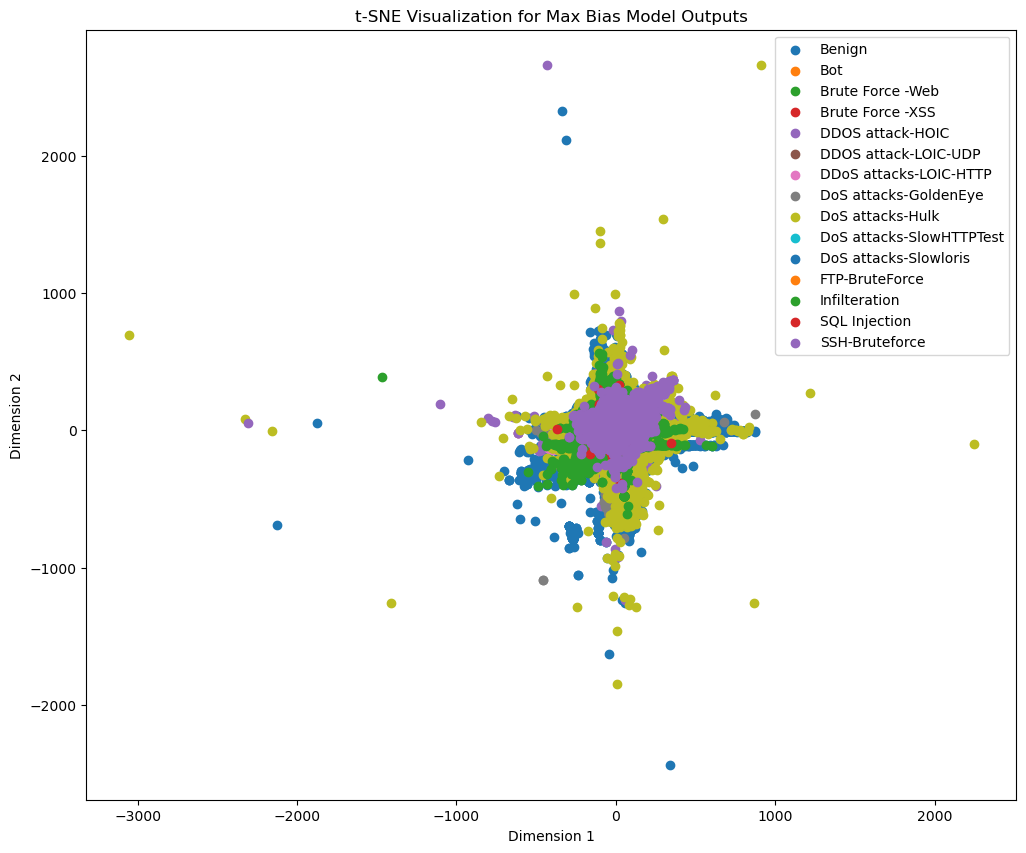

In [6]:
# Visualize the t-SNE embeddings color-coded by labels

# make big figure to show all labels
plt.figure(figsize=(12, 10))
unique_labels = np.unique(labels_array)
for label in unique_labels:
    idx = labels_array == label
    plt.scatter(embeddings[idx, 0], embeddings[idx, 1], label=f"{INT2LABEL[label]}")

plt.title("t-SNE Visualization for Max Bias Model Outputs")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(loc="best")
plt.savefig("final_plots/max_bias_tsne.png")
plt.show()

In [ ]:
# Load the npz file
loaded_data = np.load('features/focal_loss_maximum_index_model_outputs_and_labels.npz')

# Extract outputs (features) and labels
outputs_array = loaded_data['outputs']
labels_array = loaded_data['labels']

# Perform t-SNE using cuML
with using_device_type('gpu'):
    tsne_cuml = cuml.TSNE(n_components=2, perplexity=30, learning_rate=200, verbose=6, random_state=42)
    embeddings = tsne_cuml.fit_transform(outputs_array)

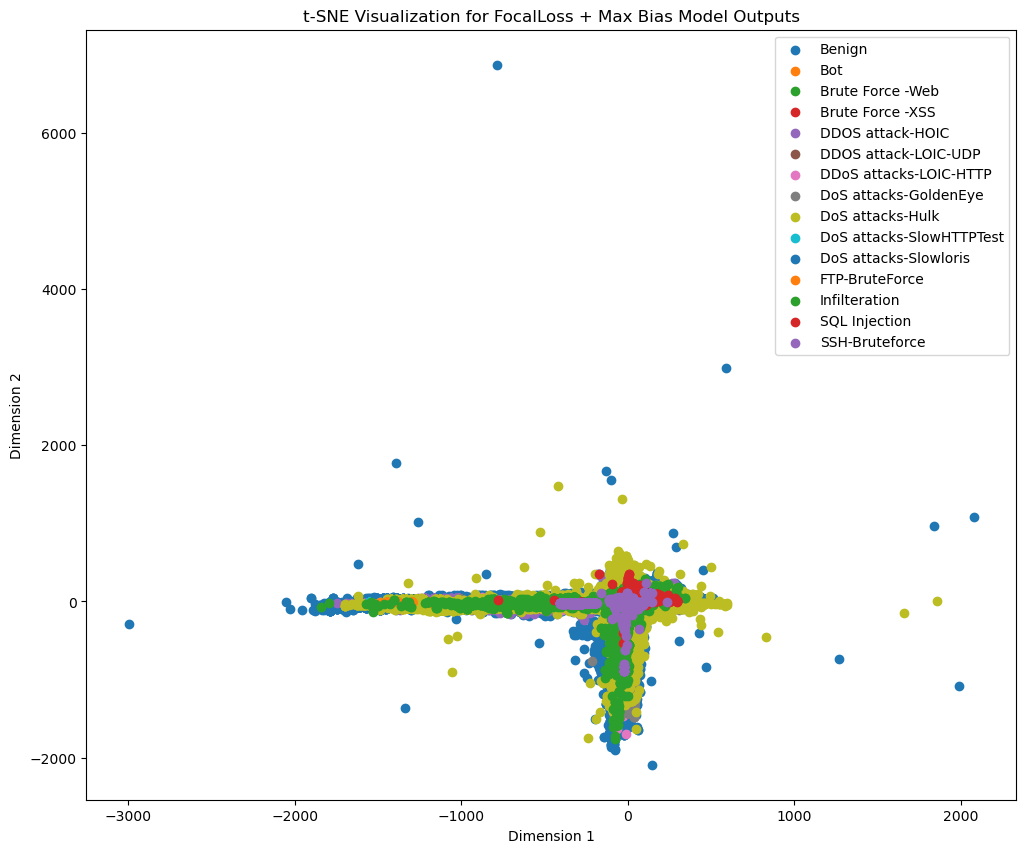

In [4]:
# Visualize the t-SNE embeddings color-coded by labels

# make big figure to show all labels
plt.figure(figsize=(12, 10))
unique_labels = np.unique(labels_array)
for label in unique_labels:
    idx = labels_array == label
    plt.scatter(embeddings[idx, 0], embeddings[idx, 1], label=f"{INT2LABEL[label]}")

plt.title("t-SNE Visualization for FocalLoss + Max Bias Model Outputs")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(loc="best")
plt.savefig("final_plots/max_bias&FocalLoss_tsne.png")
plt.show()